In [1]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from myst_nb import glue


plt.rcParams.update({'font.size':16}) 

# Plotting with `matplotlib`

## Overview

```{admonition} Questions
:class: questions
- How do I make a plot?
- How do I make it look nice?
- How do I save my plot?
```

```{admonition} Objectives
:class: objectives
- Make a **good** plot
- Save your plot as a pdf file
```

One of the most common tools that people use for data analysis is Excel. Excel is useful because it's quick and easy -- you can make a plot or find an average with the click of a button. You're welcome to use Excel in the experimental labs to record your measurements or to make a quick graph to see how your data looks. However, you should be using Python to do the analysis and plots for things like lab reports and posters. 

## Why not use Excel?

If everything we're going to do today could be done using Excel, why aren't we going to use it?

Because we want to do **reproducible science**. When you write a lab report and describe your experimental setup and methodology you're making your work reproducible; another person should be able to take your lab report and reproduce the experiment you did. Historically, while scientists have been good about giving details of their experiments, there has been less emphasis on the reproducibility of the data analysis. However, the tide is turning and there is now much more importance placed on reproducible research and analysis.

[Here](https://simplystatistics.org/2014/06/06/the-real-reason-reproducible-research-is-important/) is a nice blog post about why reproducible research is important.

So why aren't we doing our analysis in Excel and just making sure that it's reproducible? Because it's hard. Excel makes it very easy to get started, typing in your data and perhaps making a quick plot, but it doesn't keep a record of what you've done. It's very easy to accidently edit your data without realising it, or to make a mistake referencing a cell and completely change your results. This isn't just a problem for science. In 2012 the bank JPMorgan lost $6.1 billion (yes, 6.1 billion dollars) due to an [Excel error](https://www.thekeycuts.com/dear-analyst-38-breaking-down-an-excel-error-that-led-to-six-billion-loss-at-jpmorgan-chase/).


## Making a plot

The first new package we'll use today is `matplotlib`. This is the main plotting package used in Python. Over the next four years you will grow to love `matplotlib` as if it were a member of your own family. 

To use `matplotlib` we need to import it. We don't actually need the whole package, just a subpackage called `pyplot`. We'll import it using it's short name, `plt`:

In [2]:
import matplotlib.pyplot as plt

````{admonition} Good practices
:class: myinfo

So far we've been importing packages as and when we've needed them, and we've left these imports wherever we are in our notebook. While this works OK, it's common practice to do all your imports in their own cell at the top of your notebook. From now on all my imports will be in the first cell of a notebook and I won't point them out unless it's a new package. 

You will find that for most of the work you're doing for this unit (Python and experimental labs) you use the same three packages over and over again. To save time I just copy and paste the same first cell into all my notebooks to import them:

```python
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size':16}) 
```

The first line is what's known as a **magic command**. This sets the output resolution to be "retina" resolution (i.e. high res). 

The lines in the middle import the packages that I use all the time - `numpy`, `matplotlib` and `pandas` (we'll come to `pandas` later).

The final line changes the font size for my plots. The default font size is pretty small and while you might be able to read it, I can't (and remember, I'm marking your coursework...)
````

It's very simple to make a quick plot with `plt`. First we need something to plot though. 

In a new cell make two new variables called `b` and `d` that contain the following values:

In [3]:
b = 6
d = np.arange(0,10,0.1)

`np.arange()` is a useful command that you'll use a lot. Check what's stored in the `d` variable to see what's in there. Write an explanation in the markdown in your notebook to remind yourself of what it is. The documentation for `np.arange` is [here](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) if you're not sure what it's doing. 

We're now going to make a plot of $d$ vs $b \sin(d)$. All we have to do is use the `plt.plot()` command and pass it our $x$ and $y$ values (i.e $d,$ and $b \sin(d)$).

In [ ]:
fig = plt.figure(figsize=(6.4,4.8))
ax = fig.add_subplot(1,1,1)
ax.plot(d, b*np.sin(d))
glue("bad_fig", fig, display=False)


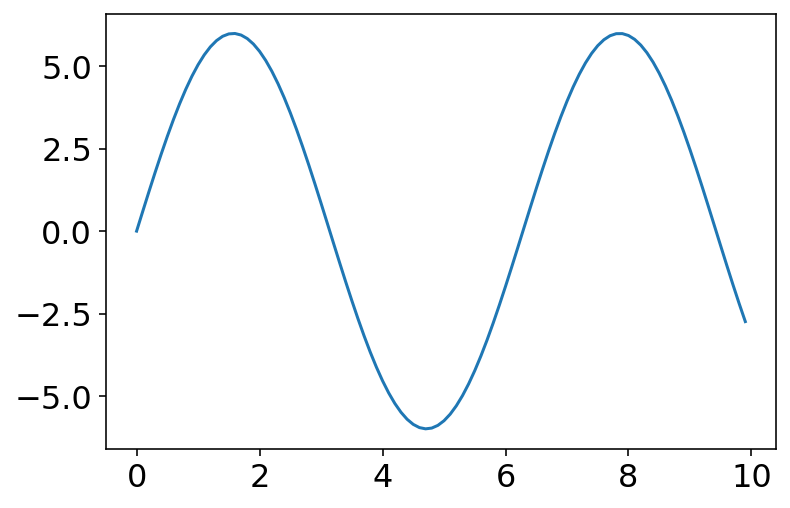

In [4]:
plt.plot(d, b*np.sin(d))

```{glue:figure} bad_fig
:width: 400px
```

We have our first plot!

But it's terrible. This plot makes me sad. It doesn't have axis labels, it's kind of small... it's generally a bit rubbish. We want **good** plots. So how do we make a good plot?

## Making a good plot

To make a **good** plot we need a couple of extra steps. The final bit of code we'll use will look like this:

```python
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(d, b*np.sin(d), color='k', linestyle='-')
ax.set_xlabel('d')
ax.set_ylabel('$b \sin(d)$')
ax.set_title('A simple plot')
plt.show()
```

The explanations below walk you through what each line does. **Read through the explanations first**, then put it all together in one cell to make a better version of the original plot. 

```python
fig = plt.figure(figsize=(10,6))
```
Here we're creating an object[^fn_obj] called `fig` that contains a `figure` object. The `figsize=(10,6)` part inside the brackets is called an **argument**. Here we're telling it that we want our figure to be 10 inches by 6 inches (why inches? because.)

[^fn_obj]: We'll cover objects in more detail in a later session when we look at *object oriented programming*.

The next line adds a **subplot** to our figure. 
```python
ax = fig.add_subplot(1,1,1)
```

Even if you only have one figure, you can use the `subplot` command. This lets you set the parameters in your plot (rather than the whole figure) by referring to the name of the subplot. In general, the layout of `subplots` is defined as follows:
```python
ax = fig.add_subplot(nrows,ncols,index)
```
Here `nrows` is the number of rows of plots you want, ncols is the number of columns, and index tells it where to put the subplot, starting at 1 in the upper left corner and increasing to the right.
So
```python
ax = fig.add_subplot(1,1,1)
```
will split your figure into 1 row, 1 column, and make the plot in the 1st position.
```python
ax = fig.add_subplot(2,3,4)
```
would split the figure into 2 rows and 3 columns, and make your plot in the lower left plot.
The `(1,1,1)` argument in `add_subplot` is saying we want an 1 $\times$ 1 array of plots, and our `ax` object refers to the first plot in the array. It might seem a bit strange that we'd add a subplot when we only want to plot one thing, but it's one of those things that makes your life easier down the line. 

Now we get to the good stuff. We use `ax.plot` to plot things!



```python
ax.plot(d, b*np.sin(d), color='k', linestyle='-')
```
You'll see this command has a few arguments. You'll also notice that there's no equals sign for our first two arguments here, unlike when we called `plt.figure`. This is because `plot` expects the first two things you give it to be the $x$ and $y$ data you want to plot. Because it always needs those you don't have to use the equals sign. The other arguments are all optional, so we can give those in any order as long as we say what they are (e.g. `color='black'` etc.)

The next three lines set our axis labels and title:

```python
ax.set_xlabel('d')
ax.set_ylabel('$b \sin(d)$')
ax.set_title('A simple plot')
```

**Note:** You don't always need a plot title. They're useful when you're doing data analysis so you can quickly see what your plot is, but you should generally use captions rather than titles for plots in things like lab reports. You **always** need axis labels. 

Finally, the last command displays our plot:

```python
plt.show()
```

Finally, putting everything together:

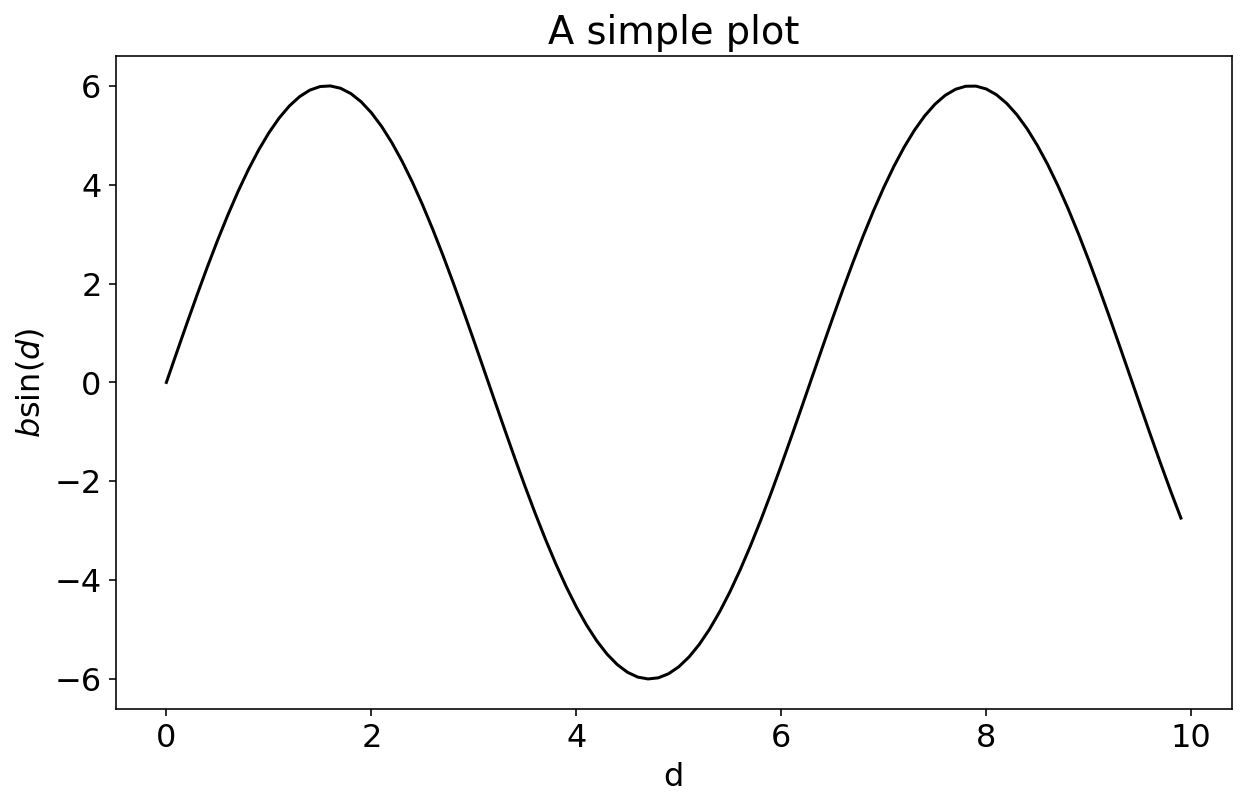

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(d, b*np.sin(d), color='k', linestyle='-')
ax.set_xlabel('d')
ax.set_ylabel('$b \sin(d)$')
ax.set_title('A simple plot')
plt.show()

That might seem like a lot of work to make one plot. But now we've done it once, we can just reuse and edit our code to make any plots we want!

```{admonition} Exercise: Edit your plot
:class: practice

Edit the code for the plot above to change the colour of the lines and the line style. Check the `matplotlib` documentation [here](https://matplotlib.org/stable/gallery/color/named_colors.html) and [here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) to see what the options are.

[solution](soln_customise_plot.ipynb)
```

## Key Points
- Make plots with `matplotlib.pyplot`
- Use the `subfig` environment to make customisation easier
- Save your plot with `savefig()`